# Classifier

### Importing Libraries

In [1]:
import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import keras

Using TensorFlow backend.


### Importing Data



In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Classifier.csv to Classifier.csv
Saving Normal.csv to Normal.csv
Saving Read.csv to Read.csv
Saving Sleep.csv to Sleep.csv
User uploaded file "Classifier.csv" with length 503636 bytes
User uploaded file "Normal.csv" with length 565 bytes
User uploaded file "Read.csv" with length 578 bytes
User uploaded file "Sleep.csv" with length 455 bytes


In [0]:
df = pd.read_csv('Classifier.csv',sep=',')

### Maniplating and Pre-Processing Data

Performing One-Hot Encoding

In [4]:
df['ISleep'] = (df["Mode"] == 0)*1.0
df['IRead'] = (df["Mode"] == 1)*1.0
df['INormal'] = (df["Mode"] == 2)*1.0

df['OSleep'] = (df["Output"] == 0)*1.0
df['ORead'] = (df["Output"] == 1)*1.0
df['ONormal'] = (df["Output"] == 2)*1.0
df['Deactivate'] = (df["Output"] == -1)*1.0

print (df.describe())

               0-1          1-2  ...      ONormal   Deactivate
count  9072.000000  9072.000000  ...  9072.000000  9072.000000
mean      0.041667     0.041667  ...     0.076389     0.500000
std       0.199837     0.199837  ...     0.265634     0.500028
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.000000     0.000000  ...     0.000000     0.000000
50%       0.000000     0.000000  ...     0.000000     0.500000
75%       0.000000     0.000000  ...     0.000000     1.000000
max       1.000000     1.000000  ...     1.000000     1.000000

[8 rows x 34 columns]


Setting Parameters

In [0]:
X = df[["0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9-10","10-11","11-12","12-13","13-14","14-15","15-16","16-17","17-18","18-19","19-20","20-21","21-22","22-23","23-24","PIR","IRead","ISleep","INormal"]]
y = df[["OSleep", "ORead","ONormal","Deactivate"]]

### Creating and Evaluating Model

In [0]:
keras.backend.clear_session()
model = Sequential()
model.add(Dense(20, input_dim=28, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                580       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 52        
Total params: 884
Trainable params: 884
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training Model

In [57]:
model.fit(X, y, epochs=20, batch_size=250)
Array, accuracy = model.evaluate(X, y)

print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20
9072/9072 [==============================] - 0s 45us/step - loss: 1.3076 - acc: 0.4182
Epoch 2/20
9072/9072 [==============================] - 0s 19us/step - loss: 1.1387 - acc: 0.6125
Epoch 3/20
9072/9072 [==============================] - 0s 20us/step - loss: 0.9185 - acc: 0.6788
Epoch 4/20
9072/9072 [==============================] - 0s 21us/step - loss: 0.6956 - acc: 0.7149
Epoch 5/20
9072/9072 [==============================] - 0s 19us/step - loss: 0.5312 - acc: 0.7264
Epoch 6/20
9072/9072 [==============================] - 0s 20us/step - loss: 0.4302 - acc: 0.7869
Epoch 7/20
9072/9072 [==============================] - 0s 21us/step - loss: 0.3494 - acc: 0.9124
Epoch 8/20
9072/9072 [==============================] - 0s 22us/step - loss: 0.2642 - acc: 0.9807
Epoch 9/20
9072/9072 [==============================] - 0s 20us/step - loss: 0.1801 - acc: 0.9961
Epoch 10/20
9072/9072 [==============================] - 0s 21us/step - loss: 0.1154 - acc: 1.0000
Epoch 11/20
9072/90

### Predicting the Output

In [0]:
Prediction = model.predict(X)


Possible_Outputs = ["Sleep","Read","Normal","Deactivate"]

Predicted_class = np.argmax(Prediction,axis=-1)
print (Predicted_class)
print (Possible_Outputs[Predicted_class[9000]])

# Intensity Predictor


### Importing Libraries

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset


### Importing Data

In [0]:
sleep = pd.read_csv('Sleep.csv',sep=',')
read = pd.read_csv('Read.csv',sep=',')
normal = pd.read_csv('Normal.csv',sep=',')

### Linear Regression

In [0]:
def Training(x,y,training_epochs,learning_rate):
	
	q = float(y.max())
	p = -1.25 * float((y.max() - y.min())/(x.max() - x.min()))
	
	W = tf.Variable(p) 
	b = tf.Variable(q)
	
	X = tf.placeholder("float")
	Y = tf.placeholder("float")

	n = len(x)
	# Hypothesis 
	y_pred = tf.add(tf.multiply(X, W), b)
	
	# Mean Squared Error Cost Function 
	cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

	optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) 

	# Global Variables Initializer 
	init = tf.global_variables_initializer() 

	# Starting the Tensorflow Session Classifer
	with tf.Session() as sess: 
		# Initializing the Variables 
		sess.run(init) 
	
		# Iterating through all the epochs 
		for epoch in range(training_epochs): 
			
			# Feeding each data point into the optimizer using Feed Dictionary 
			for (_x, _y) in zip(x, y): 
				sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
		
			# Displaying the result after every 50 epochs 
			if (epoch + 1) % 50 == 0: 
				# Calculating the cost a every epoch 
				c = sess.run(cost, feed_dict = {X : x, Y : y}) 
				print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
	
		# Storing necessary values to be used outside the Session 
		training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
		weight = sess.run(W) 
		bias = sess.run(b) 

	# Calculating the predictions 
	predictions = weight * x + bias 
	print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

	# Plotting the Results 
	plt.plot(x, y, 'ro', label ='Original data') 
	plt.plot(x, predictions, label ='Fitted line') 
	plt.title('Linear Regression Result') 
	plt.legend() 
	plt.show()

	return weight,bias
	

### Visualising Data

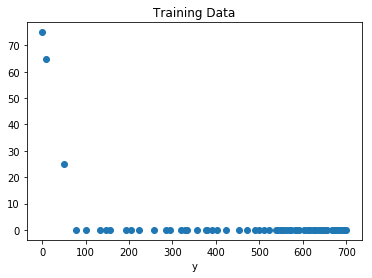

In [64]:
x_sleep = sleep["Intensity"]
y_sleep = sleep["Output"]

# Plot of Training Data 
plt.scatter(x_sleep, y_sleep) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

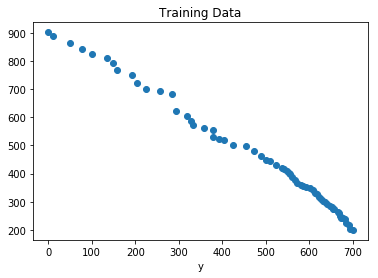

In [65]:
x_read = read["Intensity"]
y_read = read["Output"]

# Plot of Training Data 
plt.scatter(x_read, y_read) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

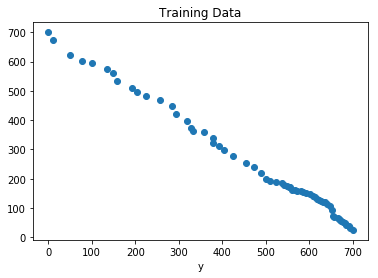

In [66]:
x_normal = normal["Intensity"]
y_normal = normal["Output"]

# Plot of Training Data 
plt.scatter(x_normal, y_normal) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

### Training Data

In [0]:
Weight_sleep,Bias_sleep =  Training(x_sleep,y_sleep,learning_rate = 0.0003,training_epochs = 10)

Epoch 50 : cost = 191.2113 W = -0.9549596 b = 903.8261
Epoch 100 : cost = 184.88322 W = -0.9583283 b = 905.7464
Epoch 150 : cost = 178.6749 W = -0.9612628 b = 907.58374
Epoch 200 : cost = 173.25443 W = -0.9640381 b = 909.33057
Epoch 250 : cost = 168.55896 W = -0.96666527 b = 910.9891
Epoch 300 : cost = 164.5176 W = -0.9691483 b = 912.56067
Training cost = 164.5176 Weight = -0.9691483 bias = 912.56067 



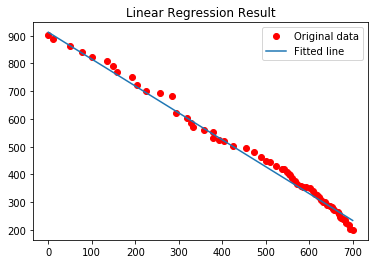

In [94]:
Weight_read,Bias_read =  Training(x_read,y_read,learning_rate = 0.003,training_epochs = 300)

Epoch 50 : cost = 102.81328 W = -0.94438416 b = 699.9159
Epoch 100 : cost = 102.1032 W = -0.9444982 b = 699.80524
Epoch 150 : cost = 101.814674 W = -0.94441694 b = 699.7215
Epoch 200 : cost = 101.60436 W = -0.94434476 b = 699.6564
Epoch 250 : cost = 101.430214 W = -0.94428384 b = 699.6019
Epoch 300 : cost = 101.255806 W = -0.9442212 b = 699.54675
Training cost = 101.255806 Weight = -0.9442212 bias = 699.54675 



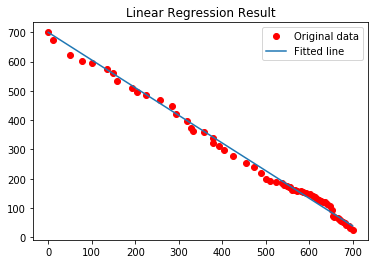

In [108]:
Weight_normal,Bias_normal =  Training(x_normal,y_normal,learning_rate = 0.0053,training_epochs = 300)